# ARIMA 모델 실습

### ARIMA 모델

* 한 스텝 앞을 예측하는 모델이다.

* Autoregressive Integrated Moving Average 는 개발된지 오래된 방법입니다.

* 시계열 데이터 분석을 위해 이해해야 하는 중요한 모델링 또는 예측 기법입니다.

* Stationary vs Non-stationary time series

* Seasonal vs Non-seasonal ARIMA

 * Non-seasonal ARIMA : ARIMA(p, d, q)
 * Seasonal ARIMA : ARIMA(p, d, q)(P, D, Q)m

* ARIMA

 * Autoregressive - AR(p) 
 * Integrated - I(d)
 * Moving Average - MA(q)

### Stationary vs Non-Stationary

* Stationary 데이터 특성

 * 연속되는 숫자들의 평균(mean)이 time invariant
 * 연속되는 숫자들의 분산(variance)이 time invariant
 * 연속되는 숫자들의 공분산(covariance)이 time invariant

 time invariant : 시간에 따라 변하지 않음

* Stationary Test

 * ARIMA 모델은 시계열 데이터가 stationary 특성을 보일 때 효과적이므로 데이터가 stationary 특성을 보이는지 확인할 수 있어야 합니다.

* Differencing

 * 시계열 데이터가 Non-Stationary 하다면 초기 **differencing** 작업("Integrated")을 한 번 이상 적용해서 데이터를 **stationary** 하게 만드는 단계가 필요합니다.

### Stationary 데이터 특성
* Stationary 데이터는 평균(mean), 분산(variance), 공분산(covariance) 이 시점에 따라 달라지지 않습니다.

### Stationarity Test

* Augmented Dickey-Fuller test

 * 통계적 시험을 통해 시계열 데이터가 stationary 특성을 보이는지 확인할 수 있습니다.

### Differencing

: 앞데이터와 뒤데이터를 빼주는 것

* **Non-stationary 데이터는 differencing을 통해 stationary하게 변환해줍니다.**

* differencing 한 데이터에 대해 stationary 할 때까지 differencing을 반복합니다.

* seasonal 데이터일 경우 season 을 기준으로 differencing 합니다.

 * 예를 들어 1년 주기의 seasonality를 갖은 월간 데이터에 대해 differencing 할 때, differencing의 시간 단위는 1이 아니라 12로 하게 됩니다.

 * seasonal ARIMA 모델의 경우 1차 differencing 후 seasonal differencing 하는 것도 흔히 사용하는 방법입니다.

 * 만약에 seasonal differencing을 통해서 연간 seasonal 패턴이 사라지고 데이터가 stationary 하게되면 파라미터 'D' 가 결정되는 것이다.

 * 이 때 사용하는 것이 앞에서 배운 Shifting 이다.

 * 1차 differencing을 하려면 1번 shifting을 하고, 12차 differencing을 하려면 12번 shifting을 해야한다.

* Integrated - I(d)

 * I(d) = Y_t - Y_t-d

 * 파라미터 d를 갖는 I함수를 정의를 한다면 현시점과 d시점만큼 lagging 된 데이터의 시점을 빼준 데이터라고 구현하게 할 수 있다.

### Seasonal vs Non-seasonal

* ARIMA(p,d,q)
* ARIMA(p,d,q)(P,D,Q)m

Seasonality가 없는 경우에 d 파라미터를 알게 되는데, 그러면 p와 q만 알면 된다.

Seasonal Differencing을 해서 seasonality까지 없앤 데이터를 갖게되면 d하고 대문자 D까지 알게되고,

대문자 D를 아는 순간 m에 대해서도 알게되니까 p, q, P, Q 에 대해서만 알아내면 된다.

이 파라미터를 알기 위해서 사용하는 방법으로 Autoregression이라는 방법이 있다.


### Autoregression - AR(p)

* t시점의 데이터와 이전 시점(t-p; lagged p)의 데이터 사이의 관계에 대한 회귀 모델 (regression model)

* Y_t = a_0 + a_1*Y_t-1 + ... + a_p*Y_t-p + e_t

> t 마이너스 시점과 t 시점 데이터의 상관관계


### Moving Average - MA(q)

* t시점의 데이터 이전 시점의 (t-q) moving average 의 residual에 대한 회귀 모델

* Noise 예측하는 것이라 생각하면 된다.

### Identification of ARIMA

* I(d) : stationary로 변환한 order d
* AR(p), MA(q):
 * AutoCorrelation Plot 과 Partial AutoCorrelation Plot을 참고해서 p와 q를 결정합니다.

---
* p와 q를 구하는 방법은

d order로 differencing을 해서 dq plot test 같은 걸로 데이터를 stationary하게 만든 다음에

AutoCorrelation Plot 과 Partial AutoCorrelation Plot을 그려서 AR 모델의 p와 MA 모델의 q 값을 결정하게 된다.

* AutoCorrelation Plot (a.k.a Correlogram)

 * 특정 시간만큼 지연된(lag) 시점의 데이터와의 연관성을 보여줍니다.

* Partial AutoCorrelation Plot

 * t 시점과 특정 시간만큼 지연된(lag) 시점 t-p의 연관성을 그 사이 (t..t-p) 데이터의 영향을 배제하고 보여줍니다.

AutoCorrelation에 대한 plot을 보면 음영처리된 부분이 신뢰수준(Confidence Level)이다.

이는 95%의 확률로 lagging된 차수에 대해서 correlation이 있다는 경계선을 의미한다.

예를 들어 20개까지 lagging을 해서 플롯을 그린 다음에 그중에 2개 이상 넘어오는 것이 있어야지 correlation이 있다고 판단하는 것이다.



---


{ 전체 순서 }

1. 데이터 읽어서 stationary하게 만들기

2. 그러기 위해서 stationary한지 검사할 수 있는 함수 만들기

3. stationary 하게 만들어서 d 값을 구하기

4. 데이터에 대해서 correlation과 auto-correlation 플롯 그리기

5. 플롯을 통해서 q와 d 값을 구하기

6. 이를 토대로 arima 모델을 학습해서 예측 진행


---







In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = \
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/monthly-milk-production.csv',
            index_col='Month',
            parse_dates=True)

In [ ]:
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.shape

(168, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   pounds per cow  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


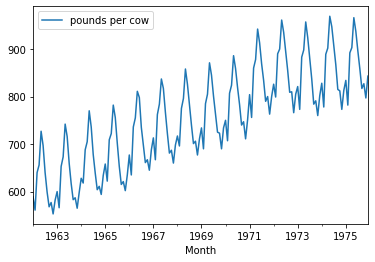

In [ ]:
df.plot()

# Trend와 Seasonality가 있는 것을 한눈에 확인할 수 있다.
# >> 소들이 젖을 많이 짜내는 시즌이 패턴으로 관측된다.

In [ ]:
timeseries = df['pounds per cow']

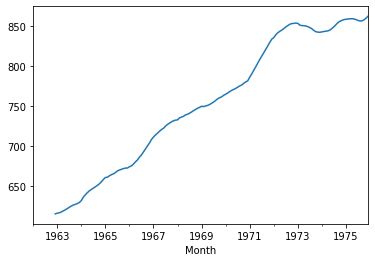

In [ ]:
# rolling mean으로 Trend 추출
timeseries.rolling(12).mean().plot()

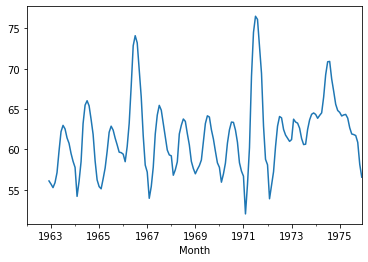

In [ ]:
# 분산 유지 여부 확인은 표준편차를 구해보면 된다.
# >> 분산이 표준편차의 제곱이기 때문
timeseries.rolling(12).std().plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(df['pounds per cow'])

<Figure size 1080x504 with 0 Axes>

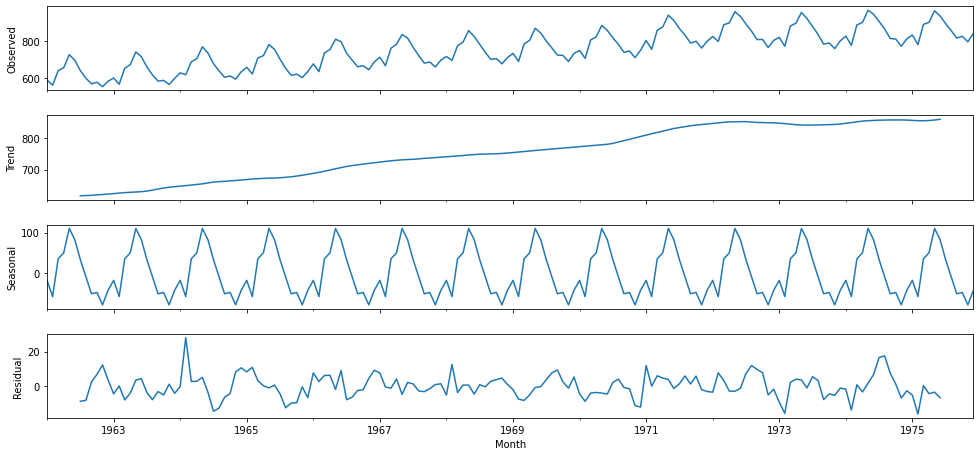

In [ ]:
fig = plt.figure(figsize=(15,7))
fig = decomposition.plot()
fig.set_size_inches(15,7)

# Trend와 Seasonality는 확실하다
# Residual에서 패턴을 찾아서 트렌드와 계절성에 더해줌으로써 데이터를 정확하게 예측하는 과정을 ARIMA를 통해서 구현하고자 한다.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['pounds per cow']) # series데이터 넘겨주기

In [ ]:
result # 결과값 중 두번째 값에 해당하는 0.627426 값이 0.5% 즉 0.05보다 작으면 stationary하다고 판단할 수 있다.

(-1.3038115874221285,
 0.6274267086030321,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [ ]:
# p-value 값 판단하는 함수 구현
def adf_check(ts):
  result = adfuller(ts)
  if result[1] <= 0.05:
    print('Stationary {}'.format(result[1]))
  else:
    print('Non-Stationary {}'.format(result[1]))

In [ ]:
adf_check(df['pounds per cow'])

Non-Stationary 0.6274267086030321


In [ ]:
# 1차원적인 differencing : 하나 앞으로 미뤄서 이전 값과 빼주는 것
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)

In [ ]:
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [ ]:
adf_check(df['1st diff'].dropna())

Stationary 0.030068004001784086


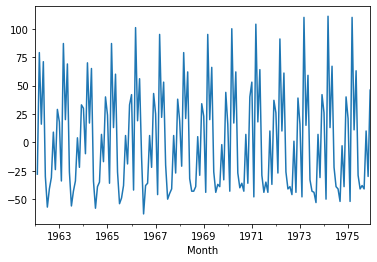

In [ ]:
df['1st diff'].plot()

# stationary한 데이터임을 확인할 수 있다.

In [ ]:
df['2nd diff'] = df['1st diff'] - df['1st diff'].shift(1)

In [ ]:
adf_check(df['2nd diff'].dropna())

Stationary 1.1126989332083225e-26


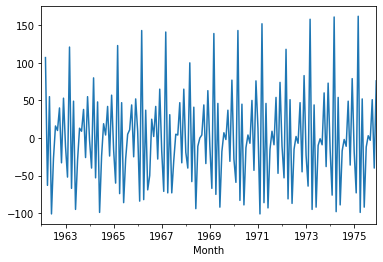

In [ ]:
df['2nd diff'].plot()

# stationary한 데이터임을 확인할 수 있다.

In [ ]:
# seasonal differencing

df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

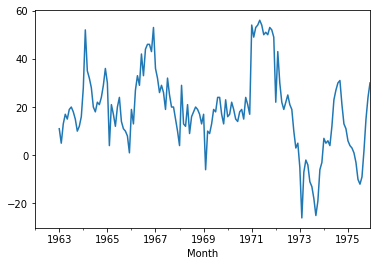

In [ ]:
df['seasonal diff'].plot()

In [ ]:
adf_check(df['seasonal diff'].dropna())

Non-Stationary 0.16079880527711288


In [ ]:
df['seasonal 1st diff'] = df['1st diff'] - df['1st diff'].shift(12)

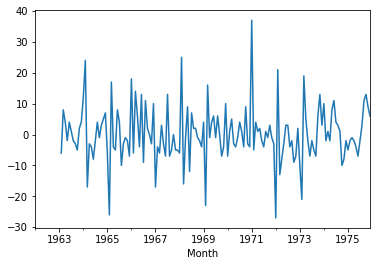

In [ ]:
df['seasonal 1st diff'].plot()

In [ ]:
adf_check(df['seasonal 1st diff'].dropna())

Stationary 1.865423431878848e-05


위 내용을 토대로 d = 1, D = 1 로 결정 !!!

=> 어떻게 왜 이렇게 결정되는지는 모르겠음... 공부 더 해야함 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

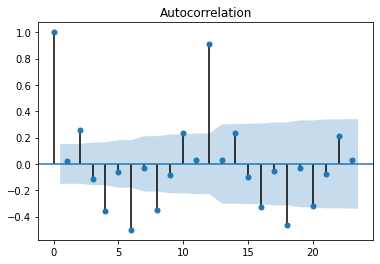

In [ ]:
plot_acf(df['1st diff'].dropna()) ;

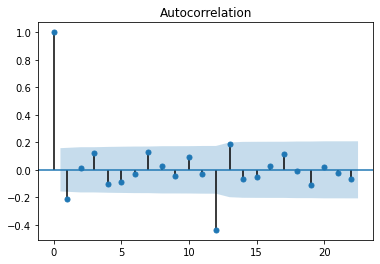

In [ ]:
plot_acf(df['seasonal 1st diff'].dropna()) ;

# lag 1 에서 음수값이 삐죽 나오면 Q값을 하나를 늘린다.
# >> Q=1

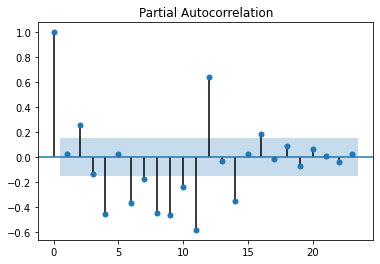

In [ ]:
plot_pacf(df['1st diff'].dropna(), method='ywm') ;

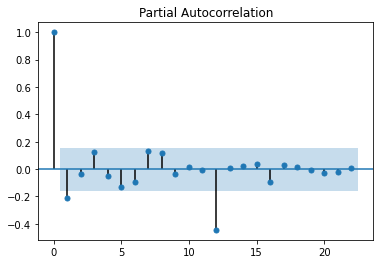

In [ ]:
plot_pacf(df['seasonal 1st diff'].dropna(), method='ywm') ;

# lag 1 에서 음수값이 삐죽 나오면 P값을 하나를 늘린다.
# >> P=1

P=1, Q=1

p=0, d=1, q=0

P=1, D=1, Q=1

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['pounds per cow'],
                                  order=(0,1,0),
                                  seasonal_order=(1,1,1,12))

In [ ]:
result = model.fit()

In [ ]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Wed, 03 Mar 2021   AIC                           1074.131
Time:                                    00:35:44   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

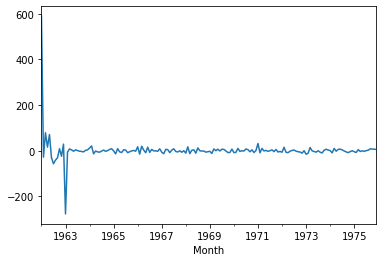

In [ ]:
result.resid.plot()

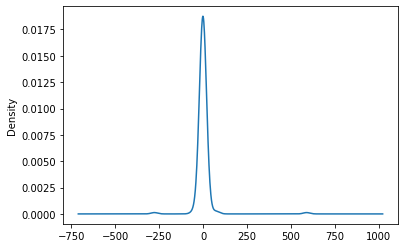

In [ ]:
result.resid.plot(kind='kde')

In [ ]:
len(df['pounds per cow'])

168

In [ ]:
df['forecast'] = result.predict(start=150, end=168, dynamic=True)

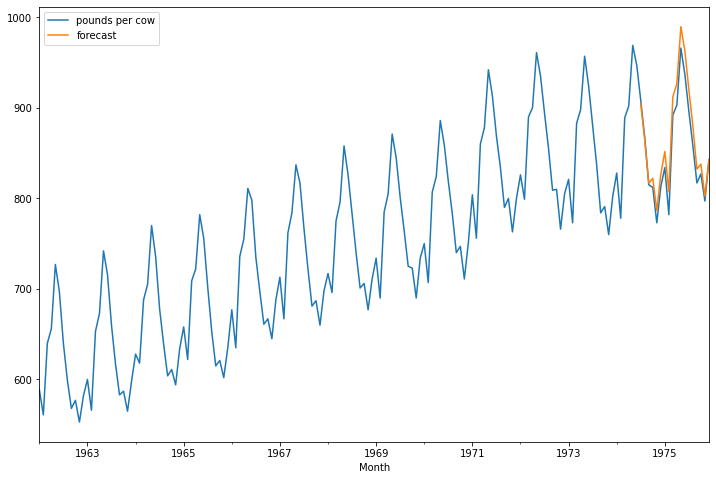

In [ ]:
df[['pounds per cow', 'forecast']].plot(figsize=(12,8))

In [ ]:
from datetime import datetime

In [ ]:
def dateparser(x):
  return datetime.strptime('190'+x, "%Y-%m")
  # "1-01" => "1901-01"

In [ ]:
shampoo = \
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/sales-of-shampoo.csv',
            index_col='Month',
            parse_dates=True,
            date_parser=dateparser)

In [ ]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales of shampoo  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [ ]:
shampoo.head()

,Sales of shampoo
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [ ]:
adf_check(shampoo['Sales of shampoo'])

Non-Stationary 1.0


In [ ]:
shampoo['1st diff'] = shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [ ]:
adf_check(shampoo['1st diff'].dropna())

Stationary 1.7998574141686703e-10


d=1

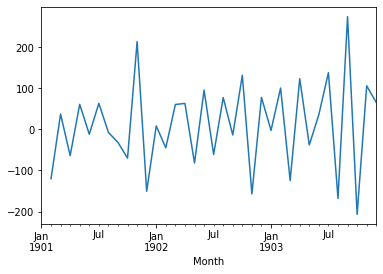

In [ ]:
shampoo['1st diff'].plot()

In [ ]:
shampoo['2nd diff'] = shampoo['1st diff'] - shampoo['1st diff'].shift(1)

In [ ]:
adf_check(shampoo['2nd diff'].dropna())

Stationary 0.003906334939659655


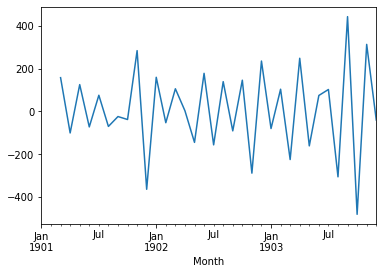

In [ ]:
shampoo['2nd diff'].plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
p = list(range(0,5))

d = [1,2]

q = [0]

In [ ]:
import itertools

In [ ]:
pdq = list(itertools.product(p,d,q))

In [ ]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0)]

In [ ]:
import warnings

warnings.filterwarnings(action='ignore') 

In [ ]:
for param in pdq:
  model = ARIMA(shampoo['Sales of shampoo'], order=param)
  result = model.fit()
  print('ARIMA{} - AIC:{}'.format(param, result.aic)) # AIC 값이 작을수록 좋은 것이다.

ARIMA(0, 1, 0) - AIC:430.87311187552797
ARIMA(0, 2, 0) - AIC:461.1578257086931
ARIMA(1, 1, 0) - AIC:406.02228959249555
ARIMA(1, 2, 0) - AIC:423.9000860378365
ARIMA(2, 1, 0) - AIC:403.6275641166328
ARIMA(2, 2, 0) - AIC:412.99938249703774
ARIMA(3, 1, 0) - AIC:404.69245918165166
ARIMA(3, 2, 0) - AIC:410.91092658457745
ARIMA(4, 1, 0) - AIC:404.7867685566915
ARIMA(4, 2, 0) - AIC:403.94822895066704


p=4, d=2, q=0

In [ ]:
X = shampoo['Sales of shampoo'].values

In [ ]:
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [ ]:
size = int(len(X)*0.66)

In [ ]:
size

23

In [ ]:
train, test = X[:size], X[size:]

In [ ]:
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [ ]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [ ]:
len(train)

23

In [ ]:
len(test)

13

In [ ]:
history = [x for x in train]

In [ ]:
history == train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
predictions = []

In [ ]:
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  result = model.fit(disp=0)
  output = result.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)

In [ ]:
predictions

[array([384.28310106]),
 array([316.88889983]),
 array([337.34969454]),
 array([378.28338291]),
 array([413.3212174]),
 array([370.97819408]),
 array([425.75731291]),
 array([429.40136297]),
 array([474.58069542]),
 array([542.7100588]),
 array([480.8135441]),
 array([634.32725856]),
 array([561.05148285])]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
error = mean_squared_error(test, predictions)

In [ ]:
rmse = np.sqrt(error)

In [ ]:
rmse

75.43158410154052

In [ ]:
shampoo['Sales of shampoo'].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo, dtype: float64

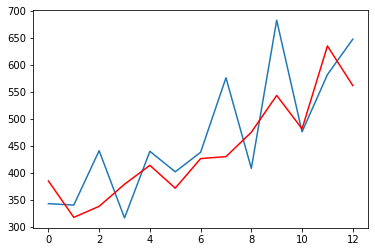

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')